# Illustration de la regréssion linéaire mulyiple sur la colonne profit du dataset 50_startups.csv

In [1]:
# Import des librairies nécessairespour le bon déoulement du travail
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Affectation du csv dans une variable
data = pd.read_csv("50_Startups.csv")

In [3]:
# Visualisation des cinq premières ligne du dataset
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Connaitre les dimensions du dataset
data.shape

(50, 5)

In [5]:
# Vérification des lignes dupliquées
data_duplicated = data.duplicated()
data_duplicated.value_counts()

False    50
dtype: int64

In [6]:
# Vérificaton des lignes nulles
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Verifiaction du type des colonnes du dataset
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
# Affichage des statistque de base
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Nous devons effectuer ici une regression linéaire multiple et nous rencontrons un problème au niveau de la colonne State qui est de type object et contient des variables catégorielles nous allons donc procéder à un codage de variables catégorielles

In [37]:
# codage de la variable catégorielle en utilisant la fonction dummmies
State_encode = pd.get_dummies(data["State"], prefix="State")

In [38]:
# Concatenation des variables codées avec les autres variables du jeu de données
data_encode = pd.concat([data, State_encode], axis=1)

In [11]:
# Suppression de la variable catégorielle d'origine
data_encode.drop("State", axis=1, inplace=True)

In [12]:
# Affichage du nouveau dataset
data_encode.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [13]:
# renommage des colonnes du dataset pour une utilisation plus optimale de celles-ci
data_encode.rename(columns={"R&D Spend": "R&D_Spend"}, inplace=True)
data_encode.rename(columns={"Marketing Spend": "Marketing_Spend"}, inplace=True)

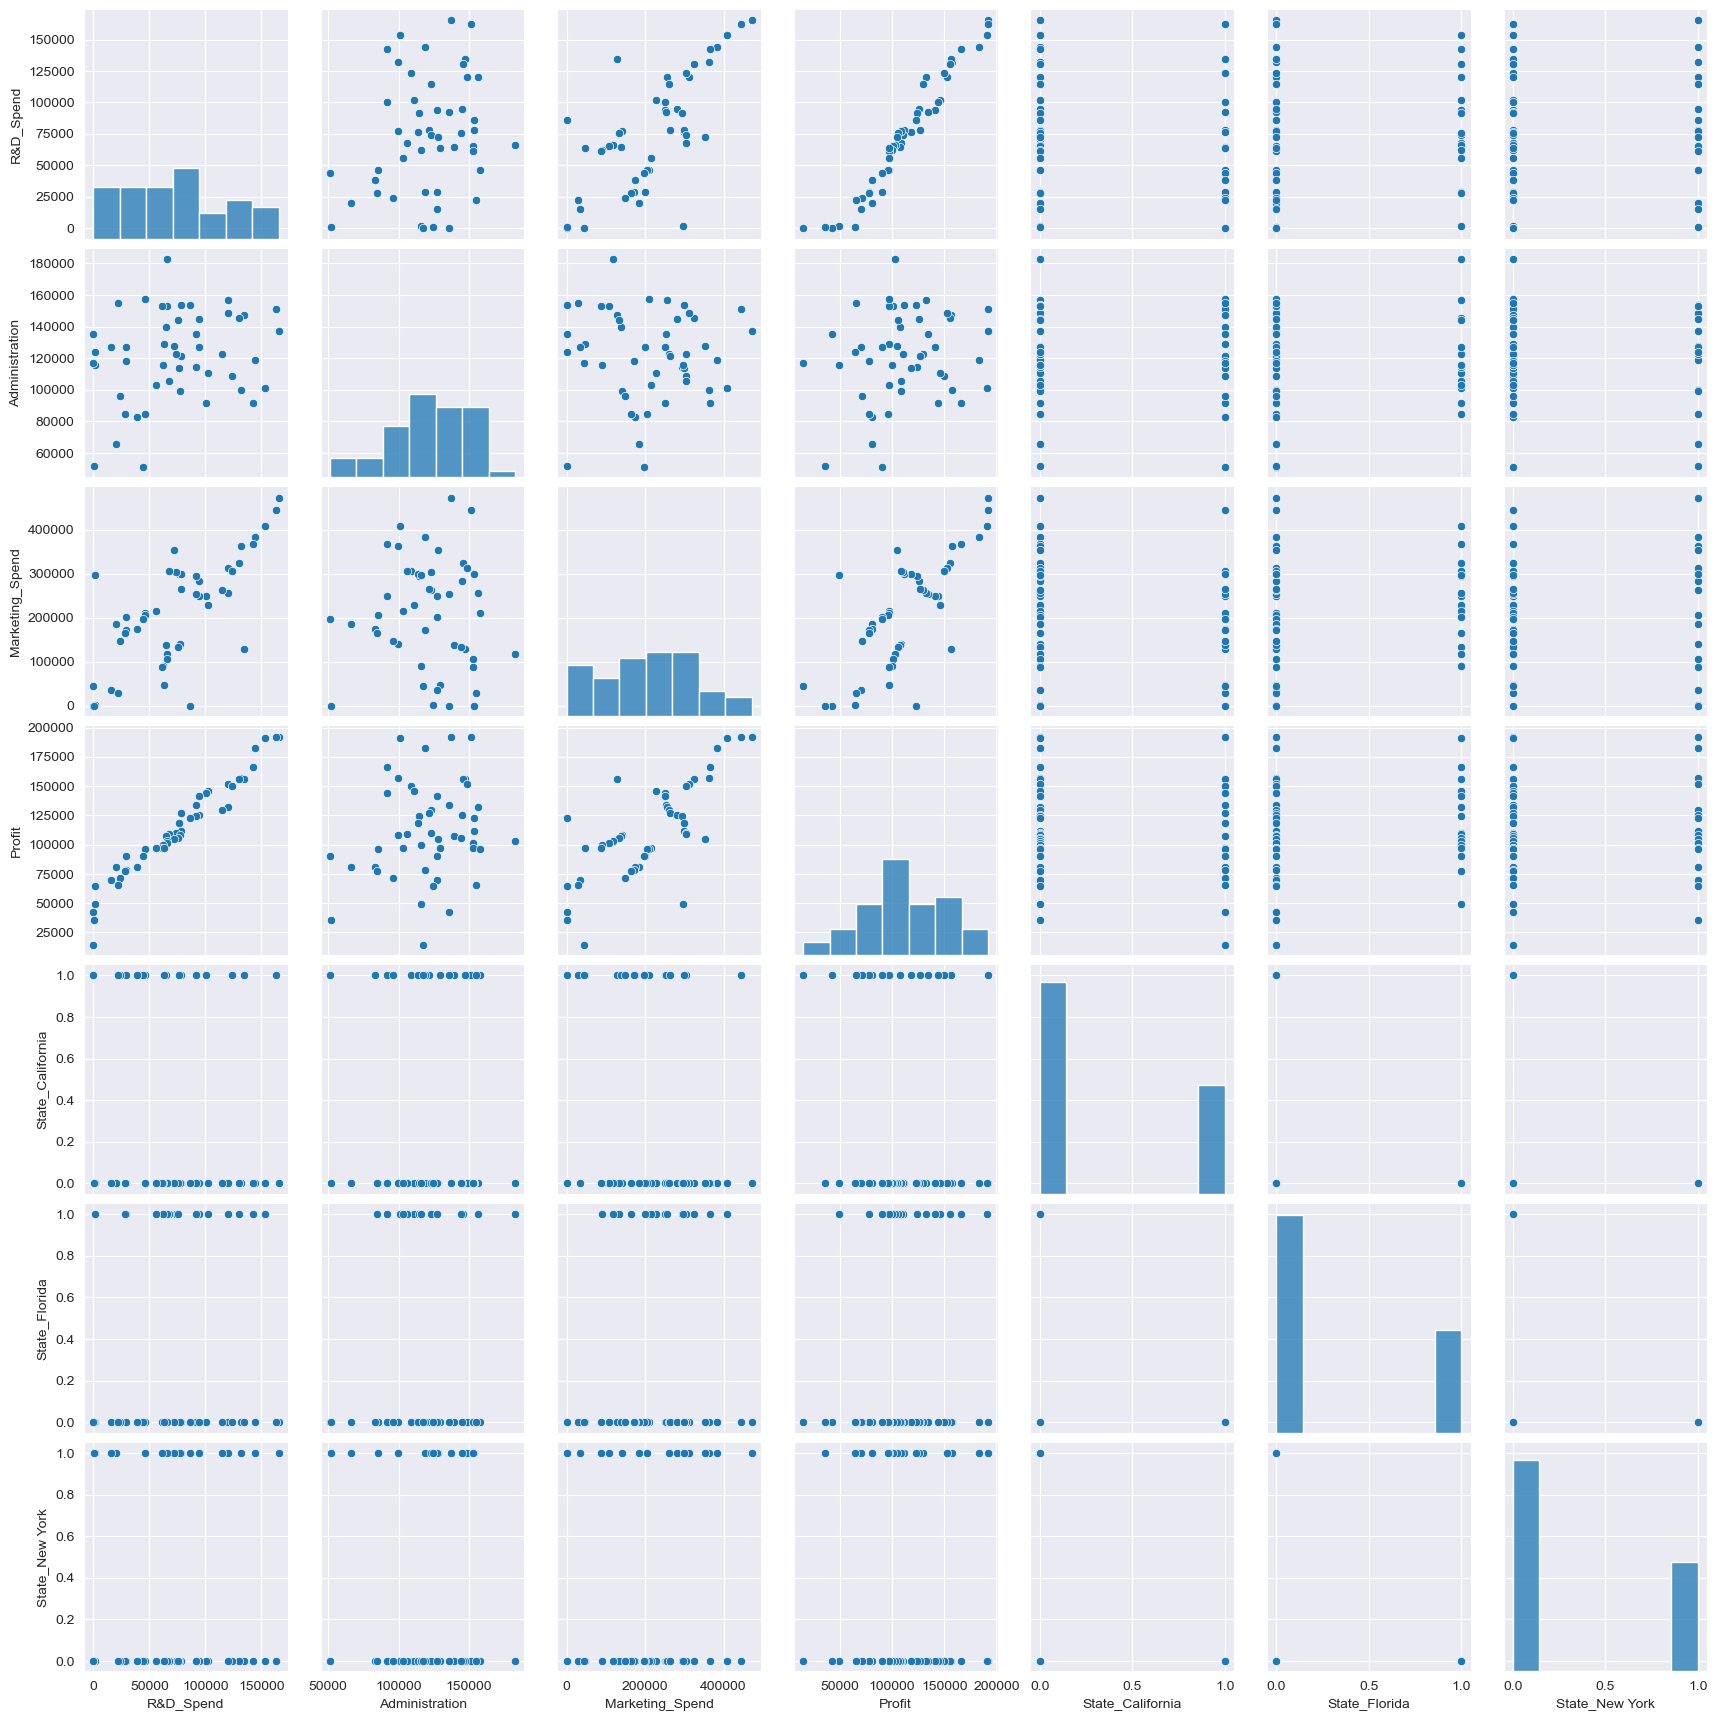

In [14]:
# Visualiser toutes les relations entre les variables
sns.pairplot(data=data_encode)

In [15]:
# Selection des colonnes de variables indépendantes et la variable dépendantes
X = data_encode[['R&D_Spend', 'Administration', 'Marketing_Spend', 'State_California', 'State_Florida', 'State_New York']]
y = data['Profit']

In [16]:
# Diviser les données en ensemble de fromation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Construisons le modèle de regression multiple en utilisant la bibliothèque scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# afficher la pente et l'interception sur l'axe des y
print(model.coef_)
print(model.intercept_)

[ 8.05630064e-01 -6.87878823e-02  2.98554429e-02 -3.15260255e+02
  6.23532751e+02 -3.08272495e+02]
54343.29984897952


In [19]:
# Tester le modèle et évaluer les performances
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train MSE: ", mse_train)
print("Train r2: ", r2_train)

Train MSE:  79700060.08259316
Train r2:  0.9537019995248526


In [20]:
# Tester le modèle et évaluer les performances
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test MSE: ", mse_test)
print("Test r2: ", r2_test)

Test MSE:  82010363.04423526
Test r2:  0.8987266414329449


In [21]:
# Utilisation du modèle pour des prévisions
x_new = np.array([3, 4, 5, 4, 5, 8]).reshape(1, -1)
y_new = model.predict(x_new)
print('Prediction: ',y_new)

Prediction:  [53736.03363401]


C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[1.0000000e+00, 0.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0

In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

ne

TypeError: minmax_scale() missing 1 required positional argument: 'X'